In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline


from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter
from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [6]:
#Read the data on csv file
data = pd.read_csv('simulated_machine_data.csv')
data.head()

,machine_id,Coolant_level,Electrical_supply_voltage,Electrical_supply_current,Compressed_air_flow_rate,Compressed_air_pressure,Compressed_air_temperature,Through_spindle_coolant_pressure,Through_spindle_coolant_flow,Flood_coolant_flow,Coolant_temperature,Coolant_Acidity,Spindle_speed,Servo_motor_vibration,Servo_motor_torque,Coolant_dilution,Ballscrew_strain,Process_sound_monitoring,Spindle_vibration,Estimated_status
0,d8b67d7f-2c3e-46e4-94cc-cdaa67023b56,187,238.7,142.6,44.0,4.4,51.4,771.8,446.9,189.3,61.7,7.2,14986.5,19.8,11.0,4.8,46.7,21.6,6.8,1
1,2591cdaa-d61b-4f90-a08c-e69741ff34fa,58,139.8,26.1,66.0,0.5,41.4,39.0,644.6,214.1,37.0,4.6,9607.2,33.5,146.5,150.2,99.0,50.4,34.9,1
2,832fd357-3ca1-4c21-869b-18f18ea88f67,267,257.7,120.1,99.9,29.0,89.3,700.5,411.0,347.9,16.0,10.1,36063.3,48.2,5.5,181.4,2.5,102.2,42.6,2
3,004c77eb-e04a-4b87-bf00-67d941bf5436,132,341.7,142.8,22.7,5.6,1.5,515.0,176.6,278.3,27.6,0.2,4326.5,1.7,125.3,190.6,92.5,78.9,5.9,1
4,08e4b5f7-b048-45f5-a2fb-e134ad02bd23,108,211.0,73.4,5.1,4.6,27.5,1431.2,94.7,55.6,87.8,5.4,18552.7,5.0,90.0,87.0,62.1,115.3,19.4,1


In [7]:
#Check if there is null value
data = data.fillna(0)
data.isnull().sum()

machine_id                          0
Coolant_level                       0
Electrical_supply_voltage           0
Electrical_supply_current           0
Compressed_air_flow_rate            0
Compressed_air_pressure             0
Compressed_air_temperature          0
Through_spindle_coolant_pressure    0
Through_spindle_coolant_flow        0
Flood_coolant_flow                  0
Coolant_temperature                 0
Coolant_Acidity                     0
Spindle_speed                       0
Servo_motor_vibration               0
Servo_motor_torque                  0
Coolant_dilution                    0
Ballscrew_strain                    0
Process_sound_monitoring            0
Spindle_vibration                   0
Estimated_status                    0
dtype: int64

In [8]:
#Check types of different columns
data.dtypes

machine_id                           object
Coolant_level                         int64
Electrical_supply_voltage           float64
Electrical_supply_current           float64
Compressed_air_flow_rate            float64
Compressed_air_pressure             float64
Compressed_air_temperature          float64
Through_spindle_coolant_pressure    float64
Through_spindle_coolant_flow        float64
Flood_coolant_flow                  float64
Coolant_temperature                 float64
Coolant_Acidity                     float64
Spindle_speed                       float64
Servo_motor_vibration               float64
Servo_motor_torque                  float64
Coolant_dilution                    float64
Ballscrew_strain                    float64
Process_sound_monitoring            float64
Spindle_vibration                   float64
Estimated_status                      int64
dtype: object

In [9]:
data = data.drop(['machine_id'], axis=1)
data.head()

,Coolant_level,Electrical_supply_voltage,Electrical_supply_current,Compressed_air_flow_rate,Compressed_air_pressure,Compressed_air_temperature,Through_spindle_coolant_pressure,Through_spindle_coolant_flow,Flood_coolant_flow,Coolant_temperature,Coolant_Acidity,Spindle_speed,Servo_motor_vibration,Servo_motor_torque,Coolant_dilution,Ballscrew_strain,Process_sound_monitoring,Spindle_vibration,Estimated_status
0,187,238.7,142.6,44.0,4.4,51.4,771.8,446.9,189.3,61.7,7.2,14986.5,19.8,11.0,4.8,46.7,21.6,6.8,1
1,58,139.8,26.1,66.0,0.5,41.4,39.0,644.6,214.1,37.0,4.6,9607.2,33.5,146.5,150.2,99.0,50.4,34.9,1
2,267,257.7,120.1,99.9,29.0,89.3,700.5,411.0,347.9,16.0,10.1,36063.3,48.2,5.5,181.4,2.5,102.2,42.6,2
3,132,341.7,142.8,22.7,5.6,1.5,515.0,176.6,278.3,27.6,0.2,4326.5,1.7,125.3,190.6,92.5,78.9,5.9,1
4,108,211.0,73.4,5.1,4.6,27.5,1431.2,94.7,55.6,87.8,5.4,18552.7,5.0,90.0,87.0,62.1,115.3,19.4,1


In [10]:
y = data.Estimated_status
x = data.drop(['Estimated_status'], axis=1)

In [11]:
# normalise the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df = scaler.fit_transform(x)
x = pd.DataFrame(df, columns = x.columns)
x.head()

,Coolant_level,Electrical_supply_voltage,Electrical_supply_current,Compressed_air_flow_rate,Compressed_air_pressure,Compressed_air_temperature,Through_spindle_coolant_pressure,Through_spindle_coolant_flow,Flood_coolant_flow,Coolant_temperature,Coolant_Acidity,Spindle_speed,Servo_motor_vibration,Servo_motor_torque,Coolant_dilution,Ballscrew_strain,Process_sound_monitoring,Spindle_vibration
0,0.485981,0.337079,1.508324,0.056282,-0.199320,0.140878,0.267748,0.492495,-0.382607,0.603616,0.06250,-0.306973,0.370732,-0.800914,-0.809191,0.671271,-0.485026,-0.280
1,-0.719626,-2.002365,-0.295780,0.405073,-0.375991,-0.090069,-0.914569,1.151935,-0.297698,-0.083449,-0.75000,-0.553715,1.039024,0.968016,1.127539,2.116022,-0.064280,1.125
2,1.233645,0.786517,1.159892,0.942529,0.915062,1.016166,0.152711,0.372748,0.160404,-0.667594,0.96875,0.659796,1.756098,-0.872715,1.543124,-0.549724,0.692476,1.510
3,-0.028037,2.773507,1.511421,-0.281411,-0.144960,-1.011547,-0.146580,-0.409106,-0.077891,-0.344924,-2.12500,-0.795934,-0.512195,0.691253,1.665668,1.936464,0.352082,-0.325
4,-0.252336,-0.318155,0.436702,-0.560444,-0.190260,-0.411085,1.331639,-0.682288,-0.840366,1.329624,-0.50000,-0.143395,-0.351220,0.230418,0.285714,1.096685,0.883857,0.350


In [12]:
Counter(y)

Counter({1: 668, 2: 514, 0: 1000})

In [13]:
pca = PCA(n_components = 18)
pca.fit(x)
print(pca.explained_variance_ratio_)

[0.20791731 0.16248566 0.09405962 0.0478375  0.04416751 0.04156057
 0.03934293 0.03833928 0.03773021 0.03682123 0.03641345 0.03525583
 0.03467515 0.03186577 0.03116572 0.02916067 0.02634255 0.02485903]


In [14]:
pca_ = PCA(n_components=7)
pca_.fit(x)
X= pca_.fit_transform(x)
print(pca_.explained_variance_ratio_)


[0.20791731 0.16248566 0.09405961 0.04781903 0.04416195 0.04156055
 0.03904728]


In [15]:
# split data into training and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# print the shapes to check everything is OK
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1745, 7)
(437, 7)
(1745,)
(437,)


In [16]:
##draw auc_roc###
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
#source: https://blog.csdn.net/qq_38410428/article/details/88106395
from scipy import interp
from itertools import cycle
def draw_auc_roc(Y_test, Y_pred):
    n_class = 3
    predicted_binary = label_binarize(Y_pred,classes = [i for i in range(n_class)])
    Y_test_binary = label_binarize(Y_test,classes = [i for i in range(n_class)])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_class):
        fpr[i], tpr[i], _ = roc_curve(Y_test_binary[:, i], predicted_binary[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binary.ravel(), predicted_binary.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_class):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_class

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



    # Plot all ROC curves
    lw = 2
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='lightblue', linestyle='-.', linewidth=2)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='slategray', linestyle='--',marker='*', linewidth=2)

    colors = cycle(['forestgreen', 'royalblue', 'cornflowerblue'])
    for i, color in zip(range(n_class), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.savefig('1.png')
    plt.show()

In [17]:
#### ExtraTreesClassifier ####
#Tune the parameters of the ETC
from sklearn.ensemble import ExtraTreesClassifier as ETC
tuned_parameters_etc = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [5,7,9,11,12],
                     'min_samples_split': [2,3,4,5,6],
                     'max_features': ["sqrt", "log2", "auto"],
                     'n_estimators': [100,150]}]
#multi-class classification cannot be evaluated by roc_auc_ovo/ovr, and f1_marco.
#roc_auc_ovr -> roc_auc_one-versus-rest
scores = ['roc_auc_ovo','accuracy']


for score in scores:
    print("# Tuning hyperparameters of ExtraTreesClassifier for %s" % score)
    print("\n")
    clf = GridSearchCV(ETC(), tuned_parameters_etc, cv=5,
                       scoring= score)
    clf.fit(x_train, y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters of ExtraTreesClassifier for roc_auc_ovo




KeyboardInterrupt: 

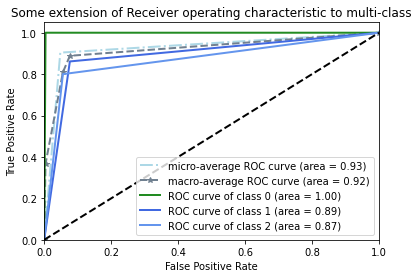

In [20]:
ETC_model = ETC(n_estimators = 150, criterion='entropy', max_depth=12, max_features='log2', min_samples_split=6)
ETC_model_fit = ETC_model.fit(x_train,y_train)
# predict the test data
ETC_predicted = ETC_model_fit.predict(x_test)
ETC_pre_prob = ETC_model_fit.predict_proba(x_test)
#show the confusion matrix and the figure of auc_roc
draw_auc_roc(y_test, ETC_predicted)

In [30]:
np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

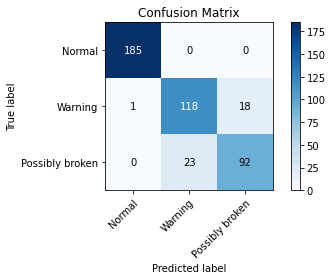

In [31]:
# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, 
                      ETC_model_fit.predict(x_test), 
                      classes=["Normal", "Warning", "Possibly broken"], 
                      title="Confusion Matrix")